In [27]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
def explore_data(group, level=0):
    indent = '  ' * level
    for key in group:
        item = group[key]
        if isinstance(item, h5py.Group):
            print(f"{indent}Grupo: {key}")
            explore_data(item, level + 1)
        elif isinstance(item, h5py.Dataset):
            print(f"{indent}Dataset: {key}, shape: {item.shape}, dtype: {item.dtype}")

filename = '/home/reyguadarrama/GSoC/data/quark-gluon_test-set_n139306.hdf5'


with h5py.File(filename, 'r') as f:
    explore_data(f)

Dataset: X_jets, shape: (139306, 125, 125, 3), dtype: float32
Dataset: m0, shape: (139306,), dtype: float32
Dataset: pt, shape: (139306,), dtype: float32
Dataset: y, shape: (139306,), dtype: float32


In [3]:
batch_size: int = 1000
n_samples: int = 10000
n_batches: int = int(n_samples/batch_size)
jets_gluon: np.array = np.empty((0, 125, 125, 3))
jets_quark: np.array = np.empty((0, 125, 125, 3))
m0_gluon: np.array = np.empty(0)
m0_quark: np.array = np.empty(0)
pt_gluon: np.array = np.empty(0)
pt_quark: np.array = np.empty(0)

for i in range(n_batches):
    with h5py.File("/home/reyguadarrama/GSoC/data/quark-gluon_test-set_n139306.hdf5", 'r') as file:
        jets = file.get('X_jets')[batch_size*i:batch_size*(i+1)]
        moment_t = file.get('pt')[batch_size*i:batch_size*(i+1)]
        mass_0 = file.get('m0')[batch_size*i:batch_size*(i+1)]
        label = file.get('y')[batch_size*i:batch_size*(i+1)]

        indices_gluon = np.where(label == 0)[0]
        indices_quark = np.where(label == 1)[0]
        
        jets_gluon = np.concatenate((jets_gluon, jets[indices_gluon]))
        jets_quark = np.concatenate((jets_quark, jets[indices_quark]))

        pt_gluon = np.concatenate((pt_gluon, moment_t[indices_gluon]))
        pt_quark = np.concatenate((pt_quark, moment_t[indices_quark]))

        m0_gluon = np.concatenate((m0_gluon, mass_0[indices_gluon]))
        m0_quark = np.concatenate((m0_quark, mass_0[indices_quark]))
        


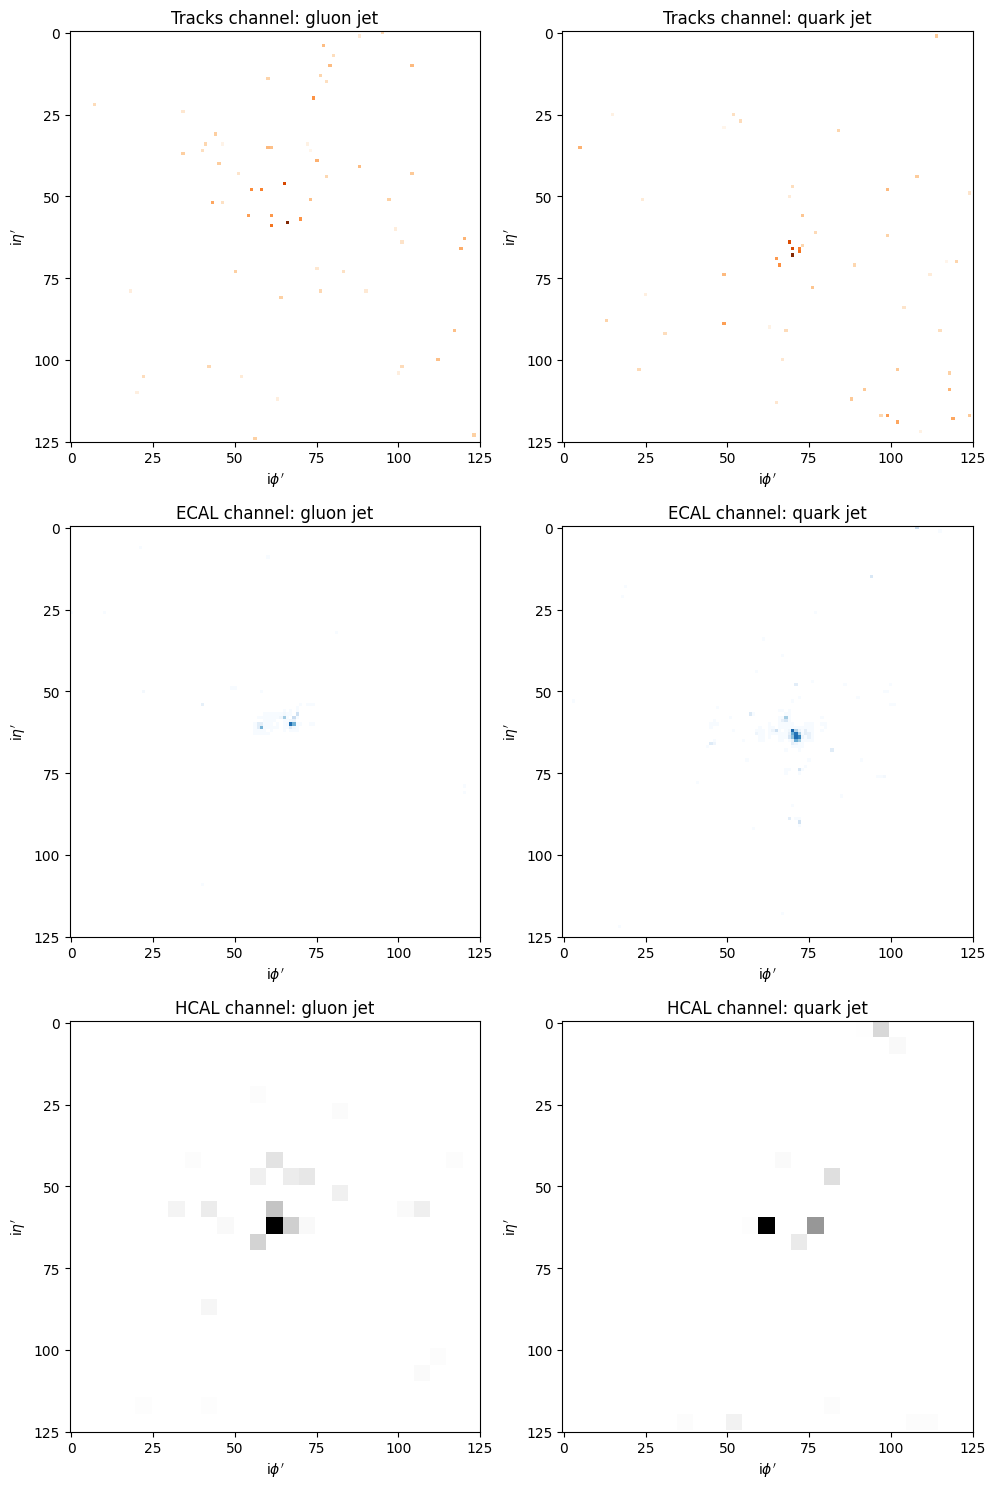

In [24]:
n = 2

# Define a LogNorm for logarithmic scaling
norm = mcolors.LogNorm()

fig, axs = plt.subplots(3, 2, figsize=(10, 15)) 

# Titles for each subplot
titles_gluon = ["Tracks channel: gluon jet", "ECAL channel: gluon jet", "HCAL channel: gluon jet"]
titles_quark = ["Tracks channel: quark jet", "ECAL channel: quark jet", "HCAL channel: quark jet"]
cmaps = ["Oranges", "Blues", "Greys"]
norms = [norm, norm, None]


# Plot gluon images
for i in range(3):
    axs[i, 0].imshow(jets_gluon[n, :, :, i], cmap=cmaps[i], norm=norms[i])
    axs[i, 0].set_title(titles_gluon[i])
    axs[i, 0].set_xticks(np.arange(0, 126, 25))
    axs[i, 0].set_yticks(np.arange(0, 126, 25))

# Plot quark images
for i in range(3):
    axs[i, 1].imshow(jets_quark[n, :, :, i], cmap=cmaps[i], norm=norms[i])
    axs[i, 1].set_title(titles_quark[i])
    axs[i, 1].set_xticks(np.arange(0, 126, 25))
    axs[i, 1].set_yticks(np.arange(0, 126, 25))


for ax in axs.flat:
    ax.set(xlabel="i$\phi '$", ylabel="i$\eta '$")


# Improve layout
plt.tight_layout()
plt.show()

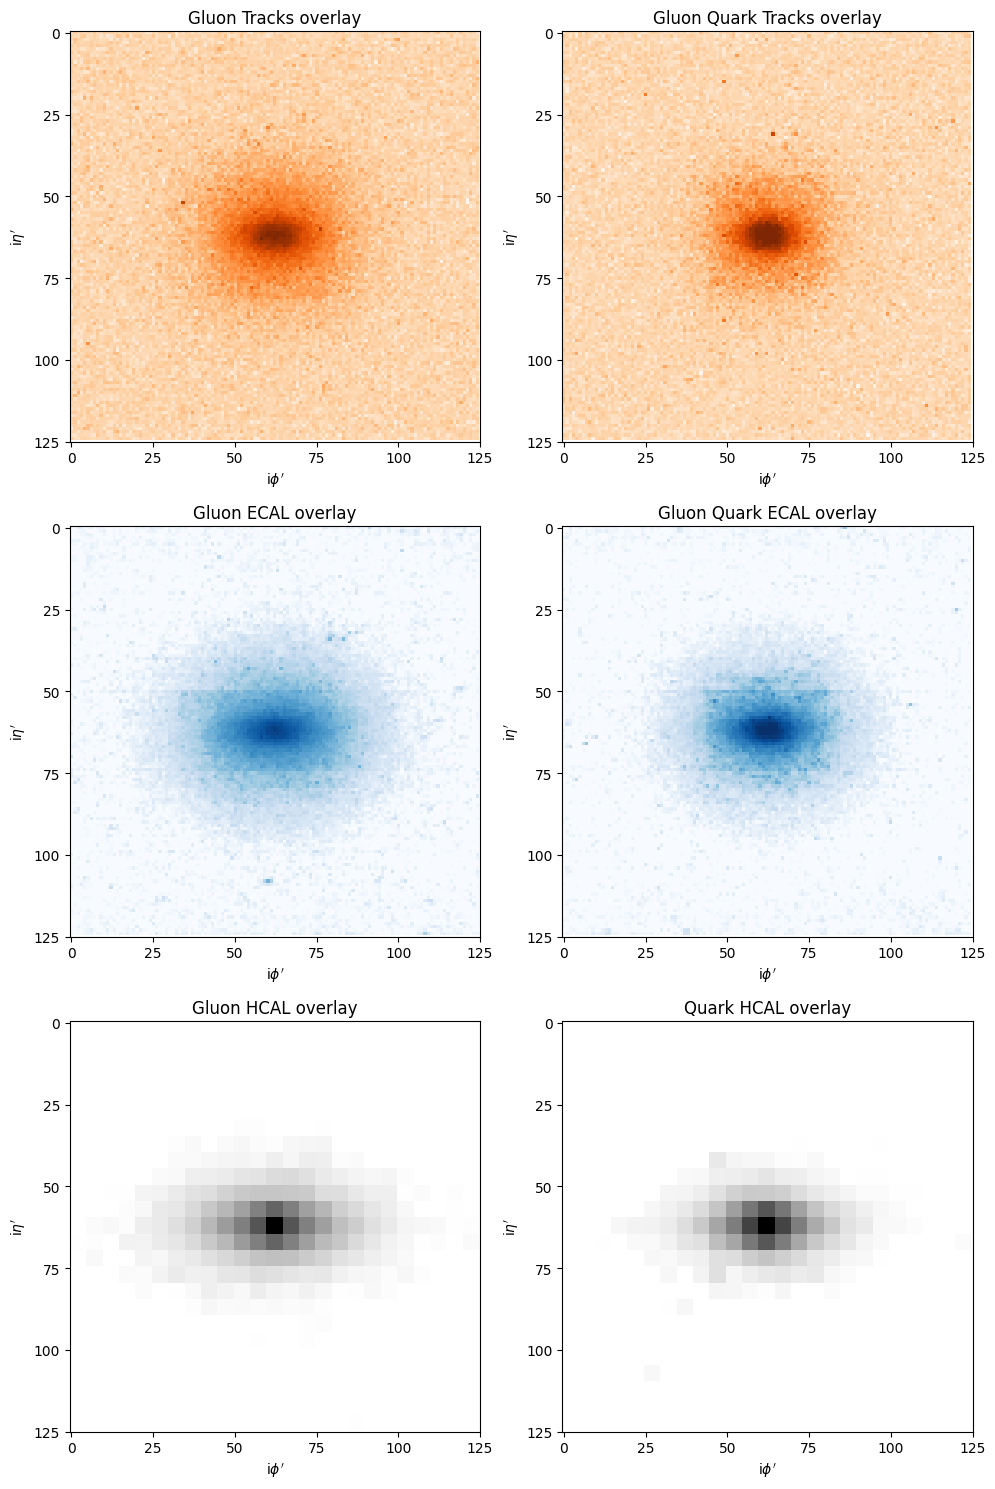

In [30]:
gluon_tracks_overlay = np.mean(jets_gluon[:,:,:,0], axis=0)
gluon_ECAL_overlay = np.mean(jets_gluon[:,:,:,1], axis=0)
gluon_HCAL_overlay = np.mean(jets_gluon[:,:,:,2], axis=0)
quark_tracks_overlay = np.mean(jets_quark[:,:,:,0], axis=0)
quark_ECAL_overlay = np.mean(jets_quark[:,:,:,1], axis=0)
quark_HCAL_overlay = np.mean(jets_quark[:,:,:,2], axis=0)

# Define a LogNorm for logarithmic scaling
norm = mcolors.LogNorm()

fig, axs = plt.subplots(3, 2, figsize=(10, 15)) 

axs[0, 0].imshow(gluon_tracks_overlay, cmap="Oranges", norm=norm)
axs[0, 0].set_title("Gluon Tracks overlay")
axs[0, 0].set_xticks(np.arange(0, 126, 25))
axs[0, 0].set_yticks(np.arange(0, 126, 25))

axs[1, 0].imshow(gluon_ECAL_overlay, cmap="Blues", norm=norm)
axs[1, 0].set_title("Gluon ECAL overlay")
axs[1, 0].set_xticks(np.arange(0, 126, 25))
axs[1, 0].set_yticks(np.arange(0, 126, 25))

axs[2, 0].imshow(gluon_HCAL_overlay, cmap="Grays", norm=norm)
axs[2, 0].set_title("Gluon HCAL overlay")
axs[2, 0].set_xticks(np.arange(0, 126, 25))
axs[2, 0].set_yticks(np.arange(0, 126, 25))

axs[0, 1].imshow(quark_tracks_overlay, cmap="Oranges", norm=norm)
axs[0, 1].set_title("Gluon Quark Tracks overlay")
axs[0, 1].set_xticks(np.arange(0, 126, 25))
axs[0, 1].set_yticks(np.arange(0, 126, 25))

axs[1, 1].imshow(quark_ECAL_overlay, cmap="Blues", norm=norm)
axs[1, 1].set_title("Gluon Quark ECAL overlay")
axs[1, 1].set_xticks(np.arange(0, 126, 25))
axs[1, 1].set_yticks(np.arange(0, 126, 25))

axs[2, 1].imshow(quark_HCAL_overlay, cmap="Grays", norm=norm)
axs[2, 1].set_title("Quark HCAL overlay")
axs[2, 1].set_xticks(np.arange(0, 126, 25))
axs[2, 1].set_yticks(np.arange(0, 126, 25))

for ax in axs.flat:
    ax.set(xlabel="i$\phi '$", ylabel="i$\eta '$")

# Improve layout
plt.tight_layout()
plt.show()

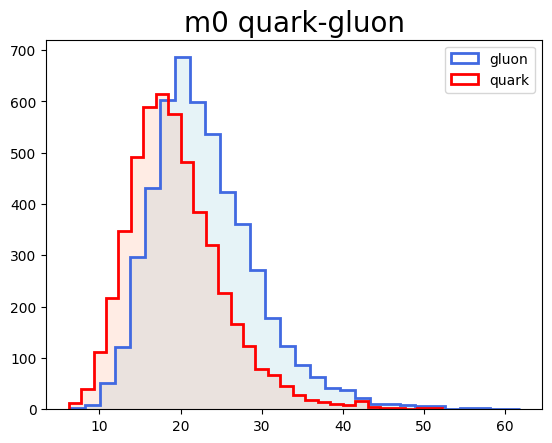

In [6]:
plt.hist(m0_gluon, bins=30, histtype="step", linewidth=2, label="gluon", color="royalblue")
plt.hist(m0_gluon, bins=30, histtype="stepfilled", linewidth=2, color="lightblue", alpha=0.3)
plt.hist(m0_quark, bins=30, histtype="step", linewidth=2, label="quark", color="red")
plt.hist(m0_quark, bins=30, histtype="stepfilled", linewidth=2, color="lightsalmon", alpha=0.2)
plt.title("m0 quark-gluon", fontsize=20)
plt.legend()
plt.show()

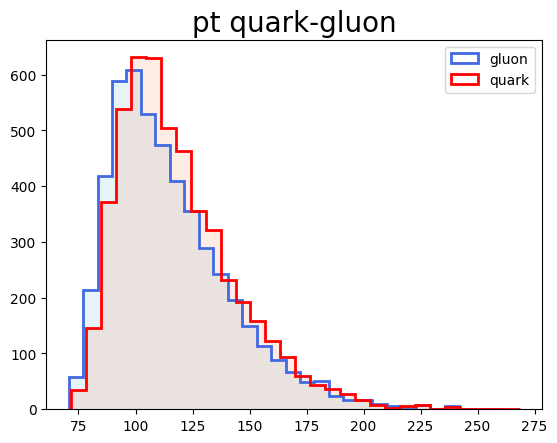

In [7]:
plt.hist(pt_gluon, bins=30, histtype="step", linewidth=2, label="gluon", color="royalblue")
plt.hist(pt_gluon, bins=30, histtype="stepfilled", linewidth=2, color="lightblue", alpha=0.3)
plt.hist(pt_quark, bins=30, histtype="step", linewidth=2, label="quark", color="red")
plt.hist(pt_quark, bins=30, histtype="stepfilled", linewidth=2, color="lightsalmon", alpha=0.2)
plt.title("pt quark-gluon", fontsize=20)
plt.legend()
plt.show()